<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Z_testing_and_P_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white", color_codes=True, rc={'figure.figsize':(15,8)})

In [2]:
def generate_normal_sample(mean, std_dev, n):
    """
    Generates a sample data array from a normal distribution.

    Parameters:
    mean (float): Mean of the normal distribution.
    std_dev (float): Standard deviation of the normal distribution.
    n (int): Number of samples.

    Returns:
    numpy.ndarray: An array of sample data.
    """
    # Generate the sample data
    sample_data = np.random.normal(mean, std_dev, n)

    # Format the data to 2 decimal places
    formatted_data = np.round(sample_data, 2)

    print("Mean: ", stat.mean(formatted_data))
    print("Standard Deviation: ", stat.stdev(formatted_data))
    # Return the formatted data
    return formatted_data

In [3]:
def z_test(mu, std_dev, sample_size, sample_mean, significance=0.05, tailed=0):
    """
      Performs a z-test and prints the results.

      Parameters:
      mu (float): Mean of the population.
      std_dev (float): Standard deviation of the population.
      sample_size (int): Number of samples.
      sample_mean (float): Mean of the sample.
      significance (float): Significance level.
      tailed (int): 0 for two-tailed test, 1 for one-tailed test at positive side, -1 for one_tailed at negative side.

      Returns:
      tuple: A tuple containing the z-score and z-critical value.
    """
    if tailed == 0:
        significance = significance / 2
    z_critical = norm.ppf(1-significance)

    # Calculate the z-score
    z_score = (sample_mean - mu) / (std_dev / np.sqrt(sample_size))

    # Print the results
    print("Z-Score: ", z_score)
    print("Z-Critical: ", z_critical)

    if tailed == 0:
        if abs(z_score) > z_critical:
            print(f"As {z_score} is not in range of {-z_critical} to {z_critical}, we reject the null hypothesis")
        else:
            print(f"As {z_score} is in range of {-z_critical} to {z_critical}, we fail to reject the null hypothesis")

    if tailed == -1:
        if z_score < z_critical:
            print(f"As {z_score} < {z_critical}, we reject the null hypothesis")
        else:
            print(f"As {z_score} is not less than {z_critical}, we fail to reject the null hypothesis")
    if tailed == 1:
        if z_score > z_critical:
            print(f"As {z_score} > {z_critical}, we reject the null hypothesis")
        else:
            print(f"As {z_score} is not greater than {z_critical}, we fail to reject the null hypothesis")

    return z_score, z_critical

In [4]:
def p_value(z_score, tailed=0):
    """
    Calculates the p

    Parameters:
    z_score (float): Z-score.
    tailed (int): 0 for two-tailed test, 1 for one-tailed test at positive side, -1 for one_tailed at negative side.
    """
    if(tailed == 1):
        p_value = 1 - norm.cdf(z_score)
    elif(tailed == -1):
        p_value = norm.cdf(z_score)
    else:
        p_value = 2 * (1 - norm.cdf(abs(z_score)))
    return np.round(p_value, 4)

In [5]:
def visualize_z_test(mu, std_dev, sample_size, sample_mean, significance=0.05, tailed=0):
  """
    Creates visualization for z-test.

    Parameters:
    mu (float): Mean of the population.
    std_dev (float): Standard deviation of the population.
    sample_size (int): Number of samples.
    sample_mean (float): Mean of the sample.
    significance (float): Significance level.
    tailed (int): 0 for two-tailed test, 1 for one-tailed test at positive side, -1 for one_tailed at negative side.
    Returns:
    None
    """

  # Create a range of values for the x-axis
  x = np.linspace(mu - 4 * std_dev, mu + 4 * std_dev, 1000)
  # Calculate the normal distribution (mean=0, std=1)
  y = norm.pdf(x, mu, std_dev / np.sqrt(sample_size))

  # Calculate the critical value
  if(tailed == -1):
    z_critical = norm.ppf(1-significance)
  elif(tailed == 1):
    z_critical = norm.ppf(1-significance)
  else:
    z_critical = norm.ppf(1-significance/2)

  plt.figure(figsize=(10, 6))
  plt.plot(x, y, label='Normal Distribution')

  # Shade the critical regions
  if tailed == 0:
    plt.fill_between(x, 0, y, where=(x <= mu - z_critical * std_dev / np.sqrt(sample_size)) | (x >= mu + z_critical * std_dev / np.sqrt(sample_size)), color='red', alpha=0.5, label='Critical Region')
  elif tailed == -1:
    plt.fill_between(x, 0, y, where=(x <= mu - z_critical * std_dev / np.sqrt(sample_size)), color='red', alpha=0.5, label='Critical Region')
  elif tailed == 1:
    plt.fill_between(x, 0, y, where=(x >= mu + z_critical * std_dev / np.sqrt(sample_size)), color='red', alpha=0.5, label='Critical Region')
  # Plot the z-score
  plt.axvline(sample_mean, color='blue', linestyle='dashed', linewidth=2, label='Sample Mean')

  # Add labels and title
  plt.title('Z-Test Visualization')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.legend()

  # Show the plot
  plt.show()

A factory has a machine that dispenses 80 mL of fluid in bottle. A employee beleives that average amount of fluid is not 80mL. Using the 40 samples, he measured the average amount dispensed by the machine to be 78 mL with standard deviation of 2.5. <br />
A) State the null and alternate hypothesis <br />
B) At 95% of confidence level, is there enough evidence to support the idea that machine is not working properly.



In [6]:
# According to the problem
# H0: mu = 80
# H1: mu != 80
# two tail analysis
# significance = 0.05

sample_data = np.array([79.01367732,81.48422719,79.75671131,78.86307698,74.36535074,
               77.64464377,74.89532401,75.23310128,73.40834428,75.6503164,
               80.10671425,75.12368659,78.29699968,74.68730475,77.93062496,
               80.45216961,81.05451956,75.60987927,73.68248401,74.2064751,
               83.15863231,76.56755378,73.92818464,76.2297779,81.95019345,
               77.84612075,80.30000677,79.87544326,78.9735076,77.4302648,
               79.42170147,79.56320948,77.78659133,75.49922101,78.25158383,
               75.51101357,75.96370744,80.68969529,80.11058689,80.99065976])

mu = 80
s = stat.stdev(sample_data)
n = len(sample_data)
x_bar = stat.mean(sample_data)
alpha = 0.05


z_critical = norm.ppf(1-alpha/2)
print("z_critical: ", z_critical)

z_score = (x_bar - mu)/(s/np.sqrt(n))
print("z_score: ", z_score)


if abs(z_score) > z_critical:
    print(f"As {z_score} is not in range of {-z_critical} to {z_critical}, we reject the null hypothesis")
else:
    print(f"As {z_score} is in range of {-z_critical} to {z_critical}, we fail to reject the null hypothesis")


z_critical:  1.959963984540054
z_score:  -5.355347804338764
As -5.355347804338764 is not in range of -1.959963984540054 to 1.959963984540054, we reject the null hypothesis


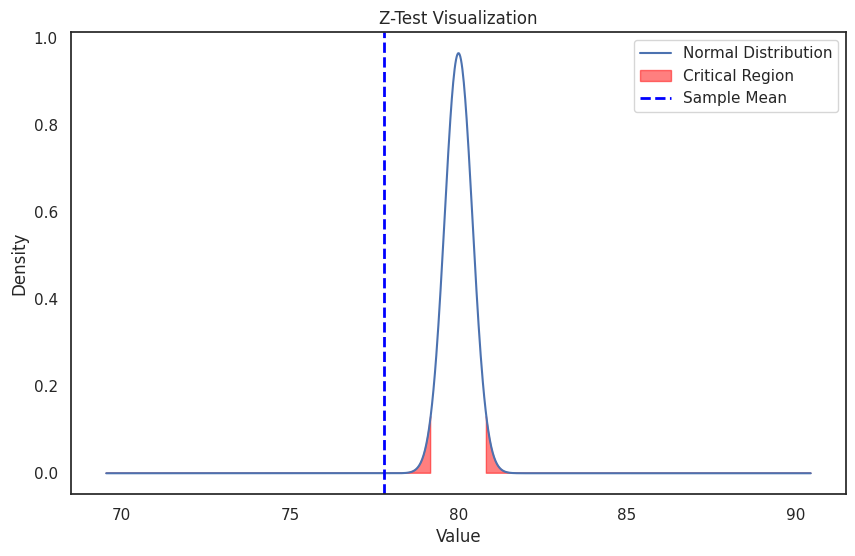

In [7]:
visualize_z_test(mu=mu, std_dev=s, sample_size=n, sample_mean=x_bar, significance=alpha)

In [8]:
print(f"P value for Z-score({z_score}): {p_value(z_score)}")

P value for Z-score(-5.355347804338764): 0.0


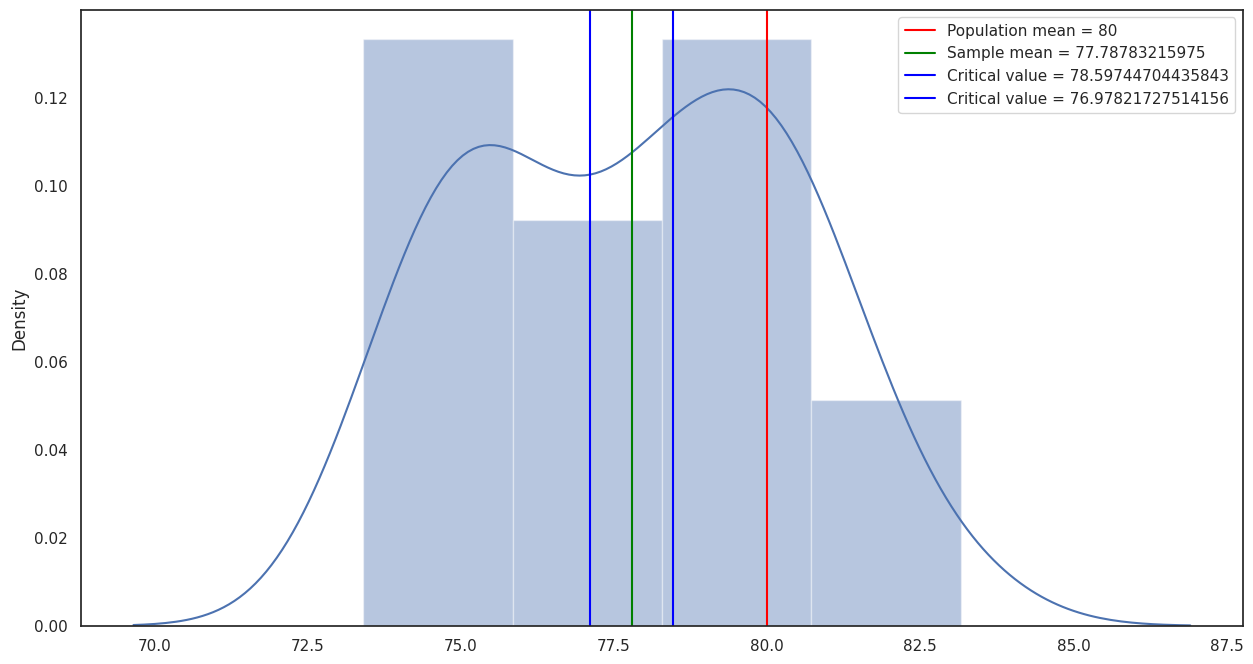

In [9]:
sns.distplot(sample_data, kde=True)
plt.axvline(x=mu, color='red', label=f"Population mean = {mu}")
plt.axvline(x=x_bar, color='green', label=f"Sample mean = {x_bar}")
plt.axvline(x=x_bar + (s/np.sqrt(n))*norm.ppf(1-alpha), color='blue',
            label=f"Critical value = {x_bar + (s/np.sqrt(n))*norm.ppf(1-alpha/2)}")
plt.axvline(x=x_bar - (s/np.sqrt(n))*norm.ppf(1-alpha), color='blue',
            label=f"Critical value = {x_bar - (s/np.sqrt(n))*norm.ppf(1-alpha/2)}")
plt.legend()
plt.show()

A country claims that children born with one working kidney live for 2 or more years. A doctor believes that this value is to be less using sample of 10 children patients. He measured that average of life span is 1.8 years, with standard deviation of 0.15 with 99% of confidence interval.

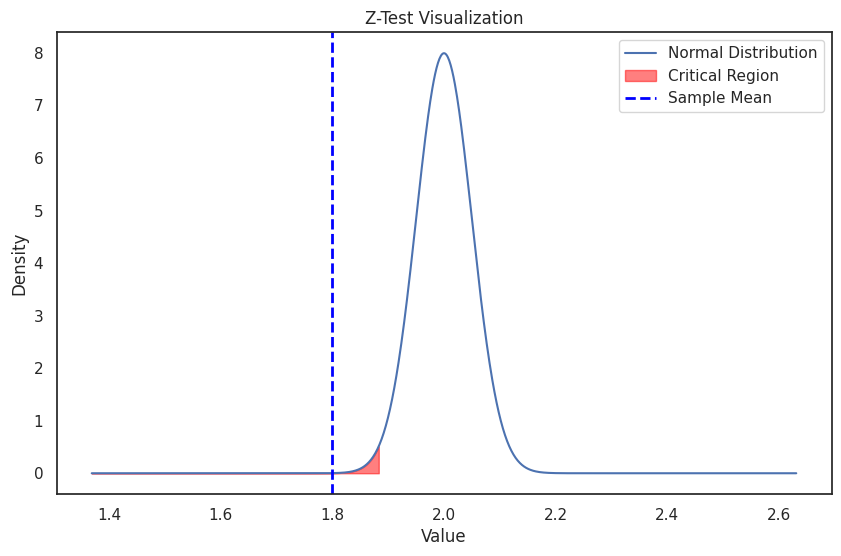

Z-Score:  -4.0071301304359945
Z-Critical:  2.3263478740408408
As -4.0071301304359945 < 2.3263478740408408, we reject the null hypothesis


In [10]:
# null hypothesis: H0: mu >= 2
# alternative hypothesis: H1: mu < 2
# one tail analysis.
# significance = 0.01

mu = 2

sample_data = [1.78, 1.87, 1.83, 1.97, 2.05, 1.63, 1.8, 1.7, 1.86, 1.51]
x_bar = stat.mean(sample_data)
s = stat.stdev(sample_data)
n = len(sample_data)

alpha = 0.01


visualize_z_test(mu, s, n, x_bar, alpha, tailed=-1)
z_score, z_critical = z_test(mu, s, n, x_bar, alpha, tailed=-1)


In [11]:
print(f"P value for Z-score({z_score}): {np.round(norm.cdf(z_score), 4)}")

P value for Z-score(-4.0071301304359945): 0.0


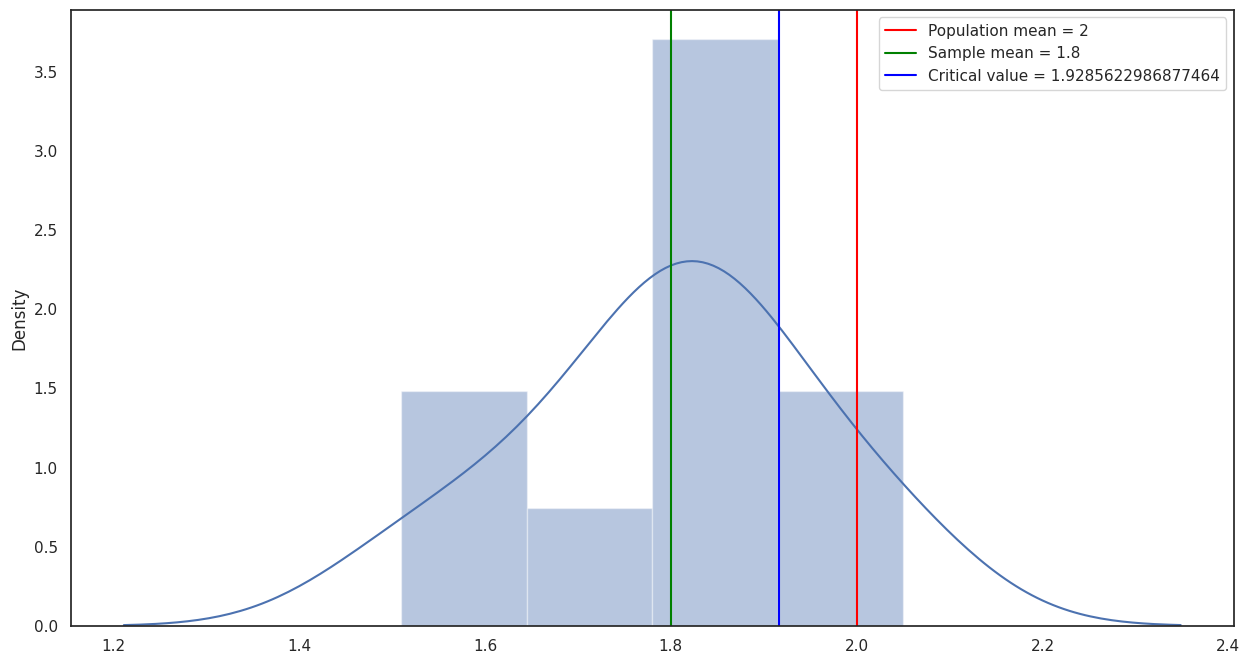

In [12]:
sns.distplot(sample_data, kde=True)
plt.axvline(x=mu, color='red', label=f"Population mean = {mu}")
plt.axvline(x=x_bar, color='green', label=f"Sample mean = {x_bar}")
plt.axvline(x=x_bar + (s/np.sqrt(n))*norm.ppf(1-alpha), color='blue',
            label=f"Critical value = {x_bar + (s/np.sqrt(n))*norm.ppf(1-alpha/2)}")

plt.legend()
plt.show()


 A teacher claims that the mean score of students in his class is greater than 82 with a standard deviation of 20.<br />
  If a sample of 81 students was selected with a mean score of 90 <br /> then check if there is enough evidence to support this claim at a 0.05 significance level.

In [13]:
# consider marks of students in sample is as follows
sample_data = generate_normal_sample(90, 20, 81)
print(sample_data)


Mean:  92.78172839506173
Standard Deviation:  19.003762771496298
[ 95.63  90.94  84.79  78.5  104.55  64.76  95.87  80.02 130.19  54.78
  81.99  81.05 113.17  86.47 141.12  78.45 100.03  76.2   46.55 117.31
 109.42 102.98 112.87 106.5   64.    94.23 113.37  67.68  76.46 116.39
  65.48 114.29  58.04  89.66  86.03  97.12 120.45  84.95  96.17  82.66
  93.82  93.94  90.41 117.38 100.45  75.87  98.21 123.89 104.43  70.53
  80.38  78.5   88.43  77.88  93.39 103.82 103.12  99.39  91.07  81.21
  97.97 115.27  95.55 101.62  64.79  95.15  99.77  90.9  143.88  84.23
 120.53  93.14  95.1  100.72  70.84  78.07 112.49 106.52  67.15  88.35
  66.04]


Mean:  86.56679012345678
Standard Deviation:  17.946235038801348
[ 90.1   85.55  89.45  59.84  88.17 115.21  90.56  89.46  90.98  81.39
  72.27  82.08 100.15  77.26  91.21 100.23  84.57 125.62  71.73 105.79
 108.9   79.68  88.27  72.06  97.64 101.83  85.55 105.8   67.61  40.38
 123.08  75.68  75.67  80.39  37.66 108.98  70.04  76.22  56.45  65.58
  77.01 104.99  62.94  67.84  72.15  95.31 106.92  91.62  80.74  83.72
  95.33  80.1   90.4   91.36  71.89  42.83  74.06 106.59 104.33  87.2
 111.62  94.56  64.37  86.38 122.24  80.76  93.26  79.99  93.42  84.21
  98.24 100.07  94.65  93.41 109.65  62.86  75.15  67.29 118.8   98.49
  86.07]
86.56679012345678


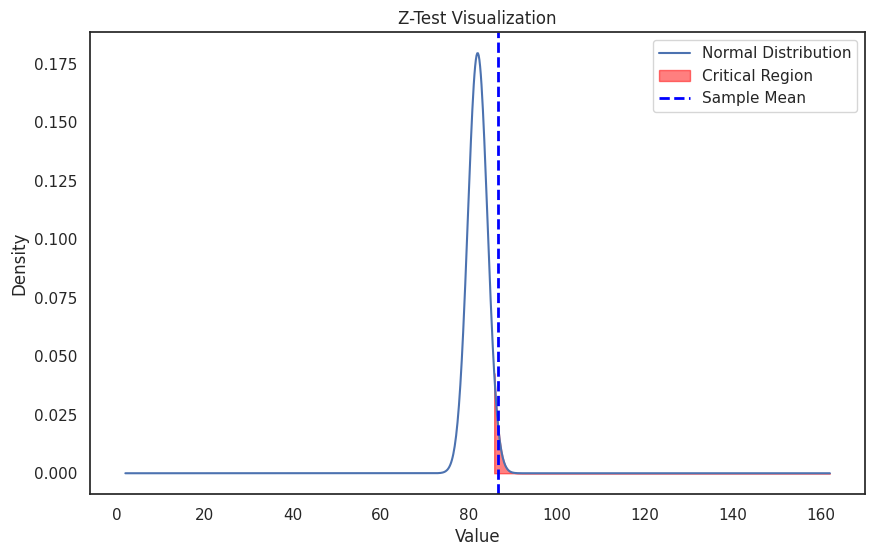

Z-Score:  2.0550555555555525
Z-Critical:  1.6448536269514722
As 2.0550555555555525 > 1.6448536269514722, we reject the null hypothesis


In [14]:
# Null hypothesis H0: mu <= 82
# Alternate Hypothesis H1: mu > 82
# one tailed analysis
# significance = 0.05

# consider marks of students in sample is as follows
sample_data = generate_normal_sample(90, 20, 81)
print(sample_data)


mu = 82
sigma = 20
n = 81
x_bar = stat.mean(sample_data)
alpha = 0.05

print(x_bar)

visualize_z_test(mu, sigma, n, x_bar, tailed=1)
z_score, _ = z_test(mu, sigma, n, x_bar, tailed=1)


In [15]:
print(f"P value for Z-score({z_score}): {np.round(norm.cdf(z_score), 4)}")

P value for Z-score(2.0550555555555525): 0.9801


An online medicine shop claims that the mean delivery time for medicines is less than 120 minutes with a standard deviation of 30 minutes.<br />
Is there enough evidence to support this claim at a 0.05 significance level <br/>
if 49 orders were examined with a mean of 100 minutes?

Mean:  100.96061224489796
Standard Deviation:  33.54647220698495
[182.27  85.01 114.19  99.9  155.59 114.94 121.73  49.82 134.32  63.19
  59.91  50.    87.66  90.46 114.77  61.76  54.   129.99 105.16 126.53
 112.19  98.15 107.1   97.76 112.72 134.41 110.48 145.28  48.96 141.16
  69.66 154.94  79.66  89.52  85.75  90.12 131.15  52.48 117.74 146.3
  85.23  49.65 131.12  87.6  132.4   51.4   58.88  95.83 128.23]


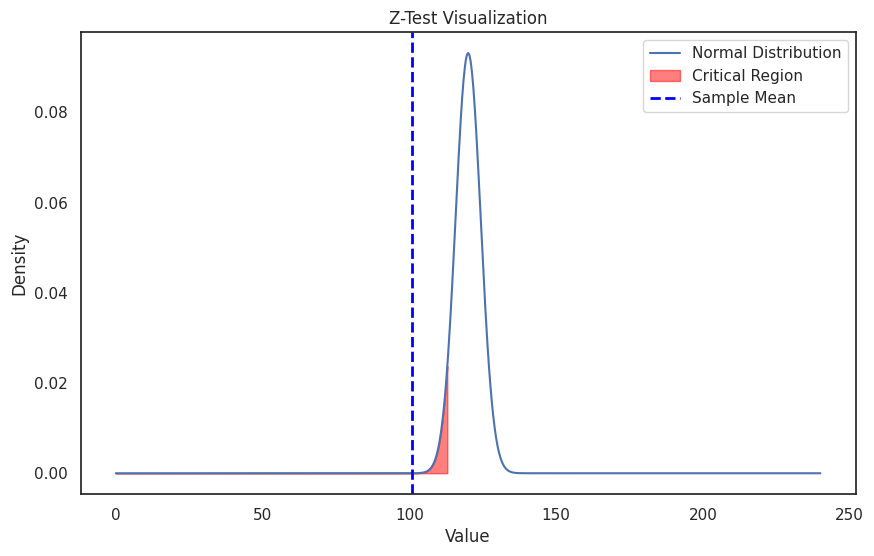

Z-Score:  -4.442523809523809
Z-Critical:  1.6448536269514722
As -4.442523809523809 < 1.6448536269514722, we reject the null hypothesis


(-4.442523809523809, 1.6448536269514722)

In [16]:
# Null hypothesis H0: mu >= 120
# Alternate hypothesis H1: mu <120
# one tail analysis
# significance = 0.05

# consider the data of time taken for 49 orders
sample_data = generate_normal_sample(100, 30, 49)
print(sample_data)

mu = 120
sigma = 30
n = 49
x_bar = stat.mean(sample_data)
alpha = 0.05

visualize_z_test(mu, sigma, n, x_bar, alpha, tailed=-1)
z_test(mu, sigma, n, x_bar, alpha, tailed=-1)



A random sample of 50 items gives mean 6.2 and standard deviation of 10.24, can it be regarded as it is drawn from the normal population with mean 5.4 at level of significance of 5%.<br />

---

Null Hypothesis: $ H_{0} $ : μ = 5.4 <br />
Alternate hypothesis: $ H_{a} $ : μ $ \ne $ 5.4

$\overline{X}$ = 6.2 <br />
σ = 10.24 <br />
α = 0.05  <br />
𝐧 = 50

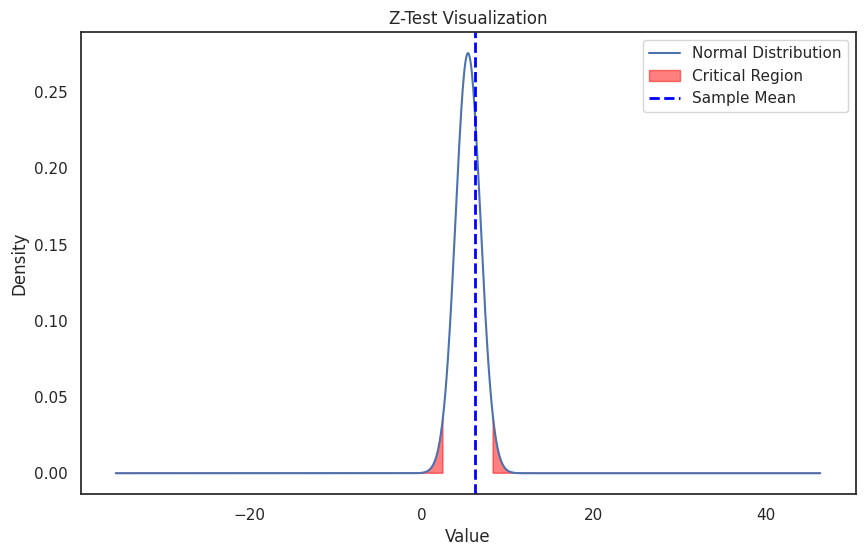

Z-Score:  0.5524271728019902
Z-Critical:  1.959963984540054
As 0.5524271728019902 is in range of -1.959963984540054 to 1.959963984540054, we fail to reject the null hypothesis


In [17]:
mu = 5.4
sigma = 10.24
n = 50
x_bar = 6.2
alpha = 0.05

visualize_z_test(mu, sigma, n, x_bar, alpha)
z_score, _ = z_test(mu, sigma, n, x_bar, alpha)

\

In [18]:
print(f"P value for Z-score({z_score}): {np.round(norm.cdf(z_score), 4)}")

P value for Z-score(0.5524271728019902): 0.7097


In this example imagine you are working at a hospital looking at the birth
weights of the 30 most recent male babies at your hospital. You would like to
conclude that mothers give birth to heavier babies at your hospital than they do
nationwide, on average. (Doubtless, this is due to your exceptional care, but
since that is hard to prove, let’s start by just determining if the babies are
heavier)<br />
The average birth weight for an American boy is 7.5 lbs., with a standard
deviation of 1.25 lbs.<br />
Using the table below, can you determine, with at least 95% confidence, if
male babies born at your hospital exceed the national average weight?<br />
Baby Number	Weight (lbs)<br />
[<br />&emsp; 5.5, 5.9, 6.0, 6.1, 6.5, 6.5, 6.8, 7.0,<br />&emsp; 7.2, 7.4,7.4, 7.5, 7.5, 7.6, 7.7, 7.7,<br />&emsp; 7.8, 7.9, 8.0, 8.2, 8.2, 8.3, 8.5, 8.9,<br />&emsp; 9.1, 9.4, 10.0, 11.0, 12.0, 12.0<br />]

---
Null Hypothesis: $ H_{0} $ : μ = 7.5 <br />
Alternate hypothesis: $ H_{a} $ : μ > 7.5

$\overline{X}$ = 7.833 <br />
σ = 1.25 <br />
α = 0.05  <br />
𝐧 = 30

7.833333333333333 7.5 1.25 30


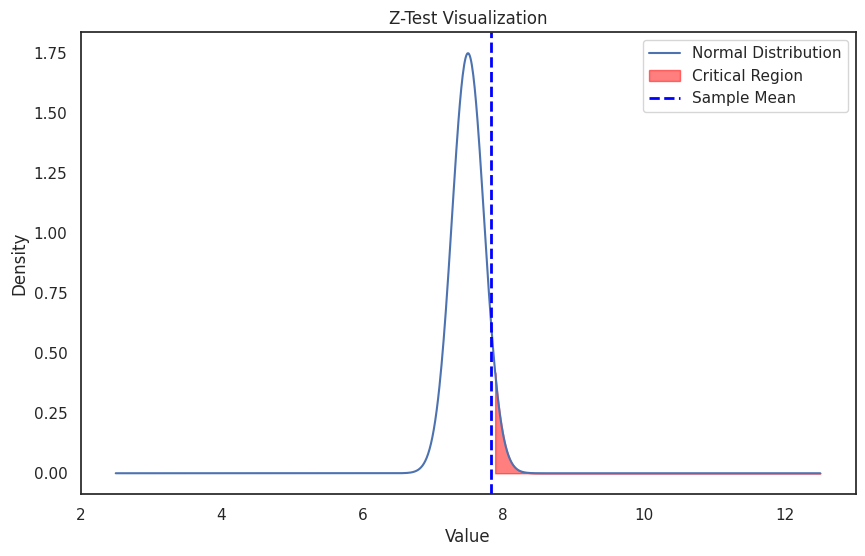

Z-Score:  1.4605934866804415
Z-Critical:  1.6448536269514722
As 1.4605934866804415 is not greater than 1.6448536269514722, we fail to reject the null hypothesis
P value for Z-score(1.461): 0.0721


In [26]:
weights = [
    5.5, 5.9, 6.0, 6.0, 6.1, 6.5, 6.5, 6.8, 7.0, 7.2,
    7.4, 7.5, 7.5, 7.6, 7.7, 7.7, 7.8, 7.9, 8.0, 8.0,
    8.2, 8.3, 8.5, 8.9, 9.0, 9.1, 9.4, 10.0, 11.0, 12.0
]
mu = 7.5
sigma = 1.25
n = 30
x_bar = stat.mean(weights)
alpha = 0.05
print(x_bar, mu,sigma, len(weights) )
visualize_z_test(mu=mu, std_dev=sigma, sample_size=n, sample_mean=x_bar, significance=alpha, tailed=1)
z_score, _ = z_test(mu=mu, std_dev=sigma, sample_size=n, sample_mean=x_bar, significance=alpha, tailed=1)
print(f"P value for Z-score({z_score:.3f}): {p_value(z_score=z_score, tailed=1)}")